In [15]:
import tensorflow as tf
import numpy as np
import tsne
fpath = "/home/mkoren/Research/DRL-AST/data/big/mlp_p1_long"
file = "itr_10000.pkl"
model = "crosswalk"

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--iters', type=int, default=101)
args = parser.parse_args()


In [13]:
import argparse

import joblib
import tensorflow as tf

from rllab.misc.console import query_yes_no
from rllab.sampler.utils import rollout
import pdb

import matplotlib.pyplot as plt
# if __name__ == "__main__":

#     parser = argparse.ArgumentParser()
#     parser.add_argument('file', type=str,
#                         help='path to the snapshot file')
#     parser.add_argument('--max_path_length', type=int, default=1000,
#                         help='Max length of rollout')
#     parser.add_argument('--speedup', type=float, default=1,
#                         help='Speedup')
#     args = parser.parse_args()

#     # If the snapshot file use tensorflow, do:
#     # import tensorflow as tf
#     # with tf.Session():
#     #     [rest of the code]

# path = None
# bin_each = 5
# epochs = 10

def query_policy(sess, fpath,file, bin_each=5, epochs=10,
                reward = None,
                count = None,
                max_reward = None,
                difs = None):
#     tf.reset_default_graph()
#     with tf.Session() as sess:

    data = joblib.load(fpath + '/' + file)
    policy = data['policy']
    env = data['env']
    baseline = data['baseline']
#     pdb.set_trace()
    low, high = env._wrapped_env._wrapped_env.observation_space.bounds
    dif = low-high
    dims = env._wrapped_env._wrapped_env.observation_space.shape[0]
    bins = np.zeros((dims, bin_each+1))
    if reward is None:
        reward = np.zeros([bin_each]*dims)
    if count is None:
        count = np.zeros([bin_each]*dims)
    if max_reward is None:
        max_reward = np.ones([bin_each]*dims)*-1E6
    if difs is None:
        difs = np.zeros([bin_each]*dims)
    for i in range(dims):
        bins[i, :] = np.linspace(low[i], high[i], bin_each+1)
    epoch = 0
    iters = bin_each ** (dims)
    print('')
    paths = np.zeros((epochs*iters, dims + 1))
    while epoch < epochs:
        n_iter = 0
        while n_iter < iters:
            path = rollout(env, policy, max_path_length=1000,
                           animated=False, speedup=1, always_return_paths=True)
            idx = np.zeros(dims, dtype=int)
            for i in range(dims):
#                 print(np.digitize(path['observations'][0][i], bins[i,:]))
                idx[i] = np.digitize(path['observations'][0][i], bins[i,:]) - 1
#             pdb.set_trace()
            values = baseline.predict(path)
            reward[tuple(idx)] = reward[tuple(idx)] + values[-1]
            count[tuple(idx)] = count[tuple(idx)] + 1
            paths[n_iter, 0:dims] = path['observations'][0]
            paths[n_iter, -1] = values[-1]
            r = np.sum(path['rewards'])
            difs[tuple(idx)] = difs[tuple(idx)] + abs(values[-1] - r)
            if max_reward[tuple(idx)] < r:
                max_reward[tuple(idx)] = r
            if (iters > 10) and (n_iter % (iters//10) == 0):
#                 pdb.set_trace()
                print('\r','Epoch ',epoch,'<',
                    int(10*n_iter//(iters))*'#',int(10 - (10*n_iter//(iters)))*' ',
                    '> ', 100*n_iter//(iters), '%', end='')
            n_iter = n_iter + 1
        print('\r','Epoch ',epoch,'<',
                      10*'#',
                     '> ', 100, '%', end='\n')
        epoch = epoch + 1
    #         pdb.set_trace()
    return {'reward':reward,'count':count,'paths':paths,'max_reward':max_reward,'difs':difs}
#         avg_reward = reward / count
#         avg_difs = difs / count
#         heatmap = plt.imshow(avg_reward[:,:,0,0,0], cmap='hot', interpolation='nearest', extent=(-1,0,-6,-2), aspect=0.25)
#         plt.colorbar(heatmap)
#         plt.show()
#   a      pdb.set_trace()
#         if not query_yes_no('Continue simulation?'):
#             break



In [29]:
import argparse

import joblib
import tensorflow as tf

from rllab.misc.console import query_yes_no
from rllab.sampler.utils import rollout
import pdb

import matplotlib.pyplot as plt
tf.reset_default_graph()
with tf.Session() as sess:
    eval_runs = query_policy(sess,fpath,file, bin_each=5, epochs=50,
                    reward=eval_runs['reward'],
                    count=eval_runs['count'],
                    max_reward=eval_runs['max_reward'],
                    difs=eval_runs['difs'])


 Epoch  0 < ########## >  100 %
 Epoch  1 < ########## >  100 %
 Epoch  2 < ########## >  100 %
 Epoch  3 < ########## >  100 %
 Epoch  4 < ########## >  100 %
 Epoch  5 < ########## >  100 %
 Epoch  6 < ########## >  100 %
 Epoch  7 < ########## >  100 %
 Epoch  8 < ########## >  100 %
 Epoch  9 < ########## >  100 %
 Epoch  10 < ########## >  100 %
 Epoch  11 < ########## >  100 %
 Epoch  12 < ########## >  100 %
 Epoch  13 < ########## >  100 %
 Epoch  14 < ########## >  100 %
 Epoch  15 < ########## >  100 %
 Epoch  16 < ########## >  100 %
 Epoch  17 < ########## >  100 %
 Epoch  18 < ########## >  100 %
 Epoch  19 < ########## >  100 %
 Epoch  20 < ########## >  100 %
 Epoch  21 < ########## >  100 %
 Epoch  22 < ########## >  100 %
 Epoch  23 < ########## >  100 %
 Epoch  24 < ########## >  100 %
 Epoch  25 < ########## >  100 %
 Epoch  26 < ########## >  100 %
 Epoch  27 < ########## >  100 %
 Epoch  28 < ########## >  100 %
 Epoch  29 < ########## >  100 %
 Epoch  30 < ######

In [26]:
for i in range(5):
    for j in range(5):
        for k in range(5):
            heatmap = plt.imshow(np.clip(max_reward[:,:,i,j,k],-1000,0), cmap='hot', interpolation='nearest', extent=(-1,0,-6,-2), aspect=0.25)
            plt.colorbar(heatmap)
            plt.title(str(i) + ', ' + str(j) + ', ' + str(k))
#             plt.show()
            plt.savefig('/home/mkoren/Dropbox/DataBox/one_max_'+str(i)+'_'+str(j)+'_'+str(k)+'.pdf', bbox_inches='tight')
            plt.gcf().clear()
            heatmap = plt.imshow(avg_reward[:,:,i,j,k], cmap='hot', interpolation='nearest', extent=(-1,0,-6,-2), aspect=0.25)
            plt.colorbar(heatmap)
            plt.title(str(i) + ', ' + str(j) + ', ' + str(k))
#             plt.show()
            plt.savefig('/home/mkoren/Dropbox/DataBox/one_avg_'+str(i)+'_'+str(j)+'_'+str(k)+'.pdf', bbox_inches='tight')
            plt.gcf().clear()
# np.max(max_reward)
heatmap = plt.imshow(np.clip(max_reward[:,:,2,2,2],-250,0), cmap='hot', interpolation='nearest', extent=(-1,0,-6,-2), aspect=0.25)
plt.colorbar(heatmap)
plt.title(str(2) + ', ' + str(2) + ', ' + str(2))
plt.show()


NameError: name 'max_reward' is not defined

[[ -61.94037287  -65.04513406  -61.92099797  -66.94282882 -111.6712058 ]
 [ -63.95143983  -64.65082577  -65.17161303  -76.18159665 -115.00756651]
 [ -67.59695796  -64.60289699  -70.16382273  -70.19595593 -114.50510675]
 [ -64.55315667  -64.73417969  -66.60082713  -69.92401939 -115.81541743]
 [ -63.80564771  -66.28642154  -67.288013    -85.07579772 -107.94240537]]
[[ 64.  67.  80.  73.  51.]
 [ 78.  78.  85.  80.  70.]
 [ 62.  57.  63.  70.  77.]
 [ 81.  76.  85.  71.  59.]
 [ 65.  74.  77.  62.  77.]]
[[ -9679.54460775  -9061.47332828  -9764.87546317 -12198.19688474
  -13774.57278164]
 [-10007.21945144  -9553.16572615 -10419.20408926 -12758.15462234
  -14325.96801658]
 [ -9847.17488907  -9319.14394936 -10342.75918869 -12503.46943448
  -14101.0887595 ]
 [ -8969.93775674  -8385.30823575  -9358.39901102 -11574.25914874
  -13301.66598689]
 [ -7473.35343922  -7147.65488972  -7748.83193635 -10422.42893153
  -11697.05055168]]
39.0
-44.2575318483


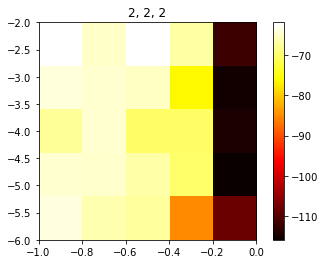

NameError: name 'bins' is not defined

In [30]:
print(eval_runs['max_reward'][:,:,2,2,2])
print(eval_runs['count'][:,:,2,2,2])
print((eval_runs['reward']/eval_runs['count'])[:,:,2,2,2])
print(np.min(eval_runs['count']))
print(np.max(eval_runs['max_reward']))
heatmap = plt.imshow(np.clip(eval_runs['max_reward'][:,:,2,2,2],-250,1), cmap='hot', interpolation='nearest', extent=(-1,0,-6,-2), aspect=0.25)
plt.colorbar(heatmap)
plt.title(str(2) + ', ' + str(2) + ', ' + str(2))
plt.show()
# plt.savefig('/home/mkoren/Dropbox/one_max_2_2_2.pdf', bbox_inches='tight')
plt.gcf().clear()
bins


In [92]:
import argparse

import joblib
import tensorflow as tf

from rllab.misc.console import query_yes_no
from rllab.sampler.utils import rollout
import pdb

import matplotlib.pyplot as plt
tf.reset_default_graph()
with tf.Session() as sess:
    eval_runs_2 = query_policy(sess,"/home/mkoren/Research/DRL-AST/data/rand_start/one_ped/b4000",'itr_1500.pkl', bin_each=5, epochs=1)

ValueError: Cannot feed value of shape (1, 11) for Tensor 'mlp_policy/flat_input:0', which has shape '(?, 14)'

In [ ]:
import argparse

import joblib
import tensorflow as tf

from rllab.misc.console import query_yes_no
from rllab.sampler.utils import rollout
import pdb

import matplotlib.pyplot as plt
tf.reset_default_graph()
with tf.Session() as sess:
    eval_runs_2 = query_policy(sess,"/home/mkoren/Research/DRL-AST/data/rand_start/one_ped/b4000",file, bin_each=5, epochs=50,
                    reward=eval_runs['reward'],
                    count=eval_runs['count'],
                    max_reward=eval_runs['max_reward'],
                    difs=eval_runs['difs'])
# for i in range(5):
#     for j in range(5):
#         for k in range(5):
# heatmap = plt.imshow(np.clip(max_reward[:,:,i,j,k],-1000,0), cmap='hot', interpolation='nearest', extent=(-1,0,-6,-2), aspect=0.25)
# plt.colorbar(heatmap)
# plt.title(str(i) + ', ' + str(j) + ', ' + str(k))
# #             plt.show()
# plt.savefig('/home/mkoren/Dropbox/DataBox/two_max_'+str(i)+'_'+str(j)+'_'+str(k)+'.pdf', bbox_inches='tight')
# plt.gcf().clear()
# heatmap = plt.imshow(np.clip(avg_reward[:,:,i,j,k],-1000,0), cmap='hot', interpolation='nearest', extent=(-1,0,-6,-2), aspect=0.25)
# plt.colorbar(heatmap)
# plt.title(str(i) + ', ' + str(j) + ', ' + str(k))
# #             plt.show()
# plt.savefig('/home/mkoren/Dropbox/DataBox/two_avg_'+str(i)+'_'+str(j)+'_'+str(k)+'.pdf', bbox_inches='tight')
# plt.gcf().clear()

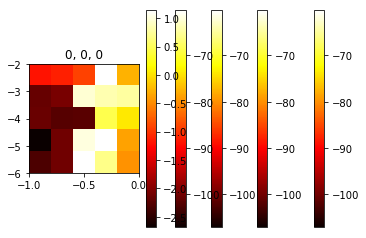

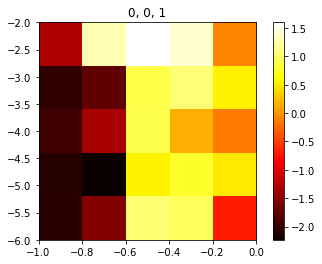

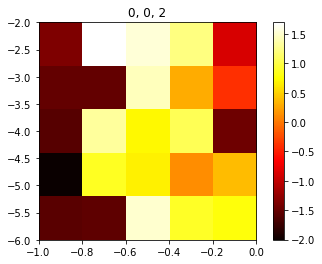

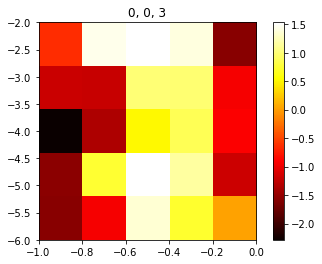

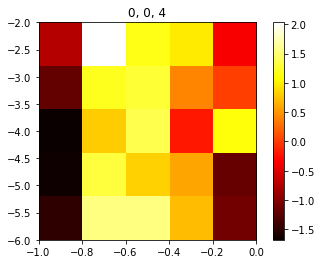

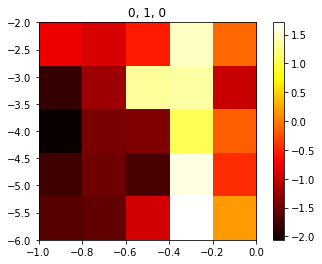

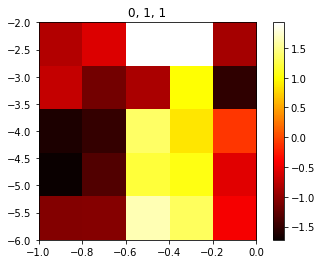

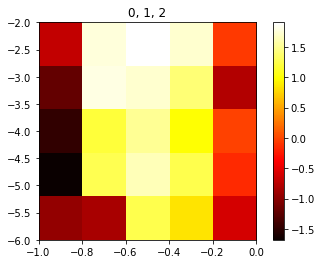

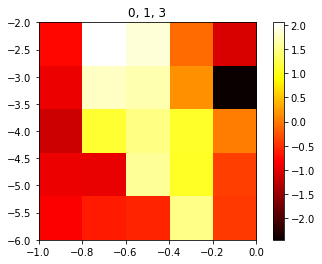

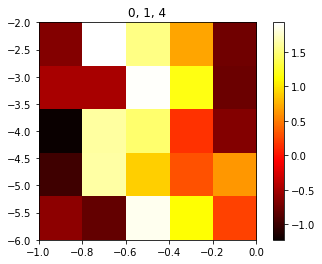

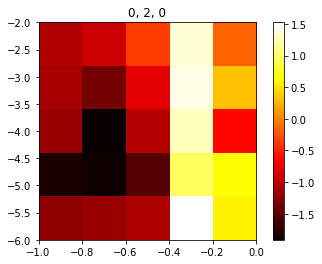

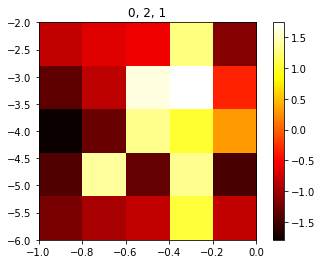

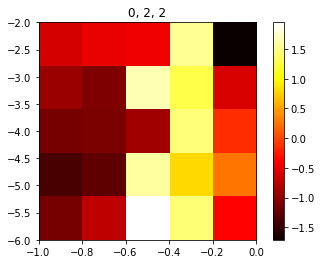

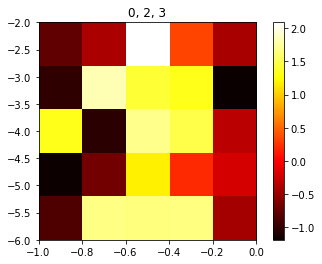

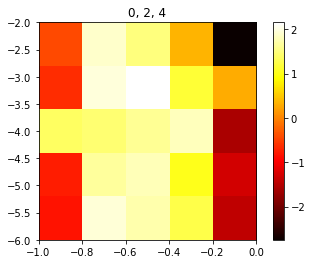

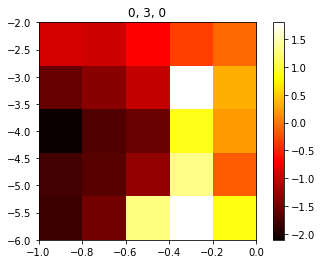

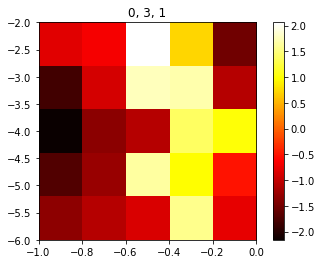

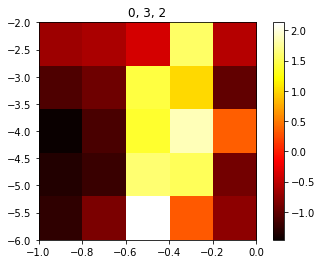

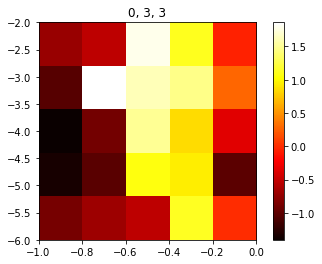

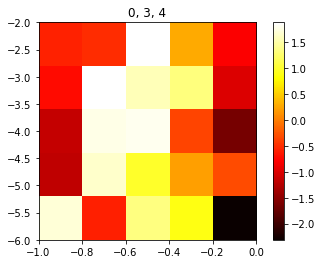

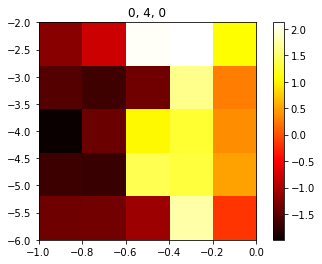

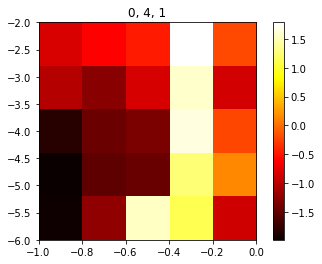

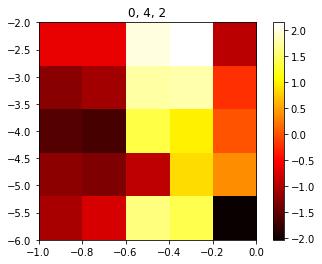

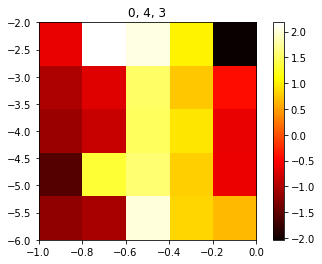

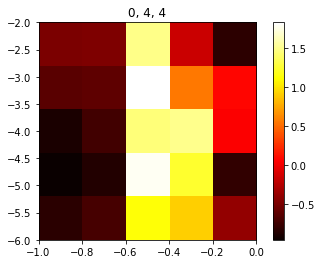

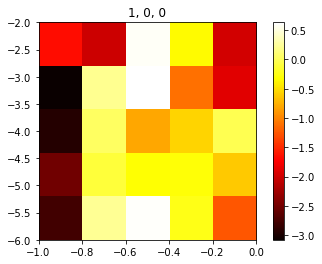

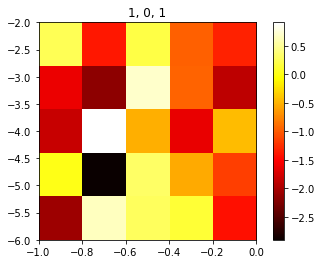

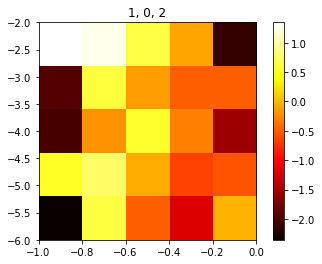

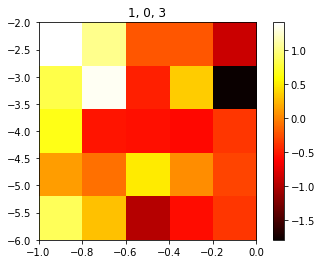

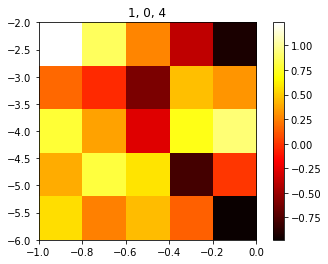

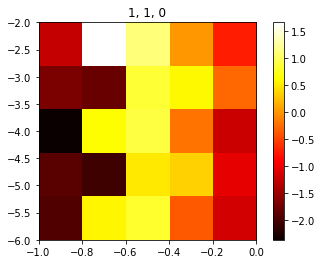

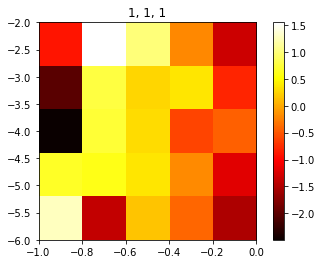

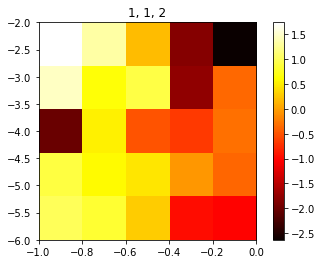

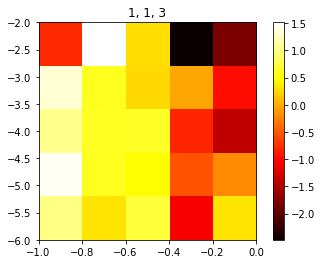

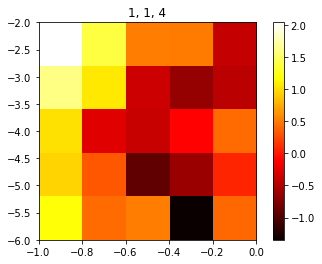

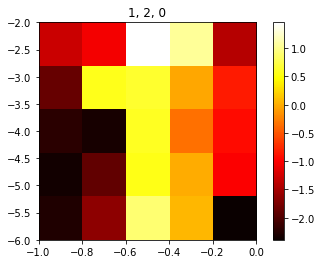

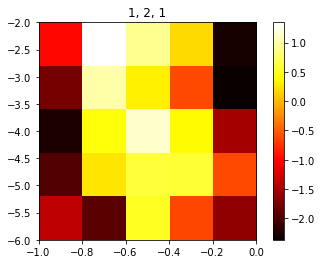

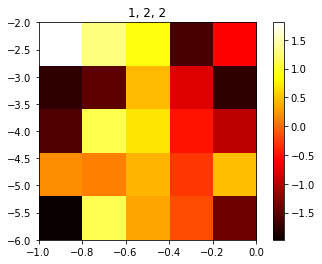

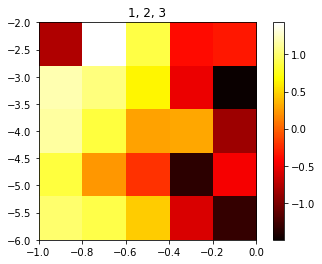

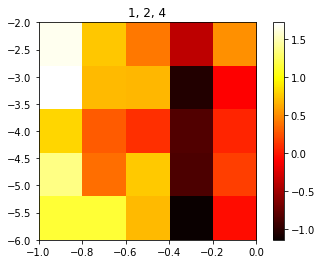

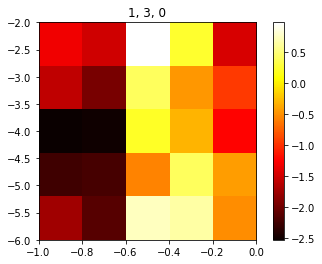

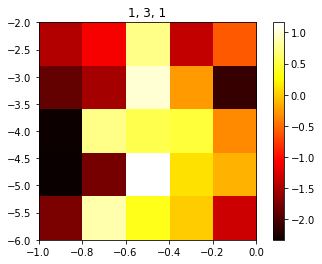

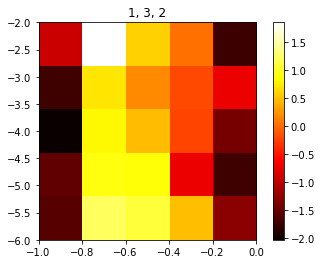

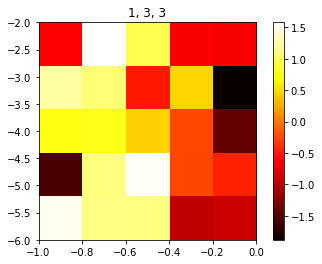

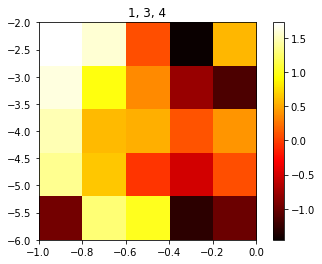

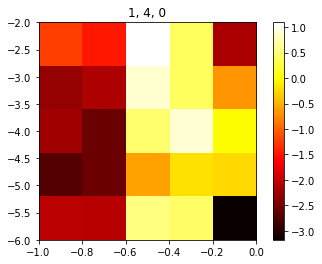

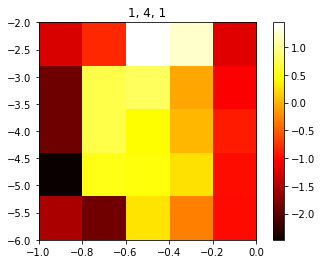

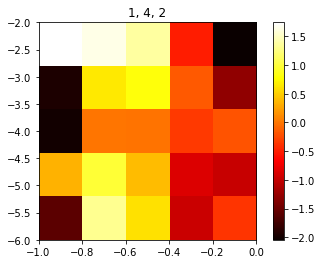

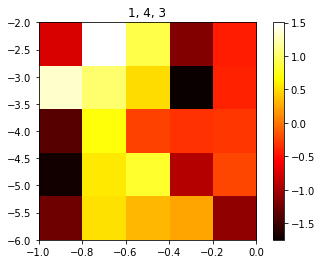

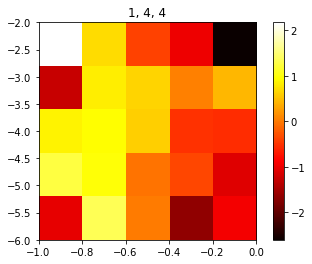

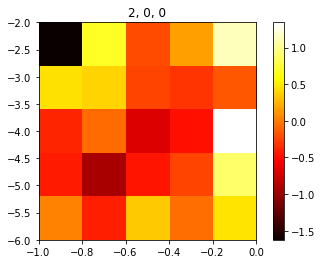

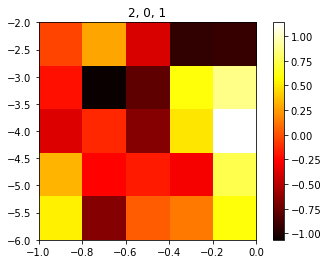

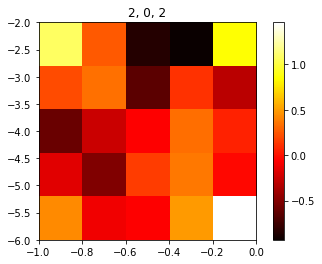

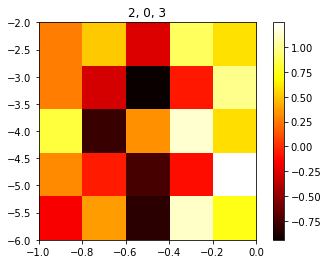

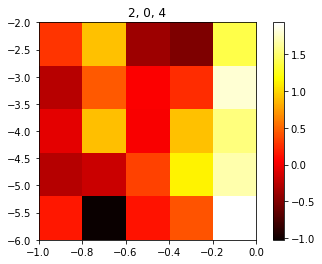

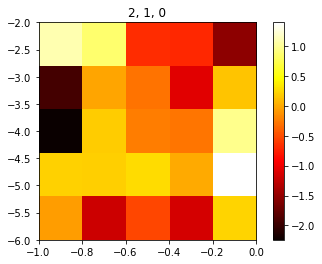

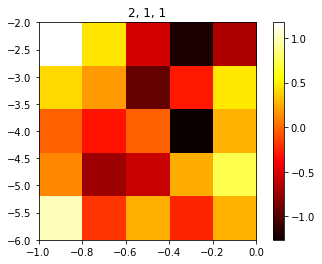

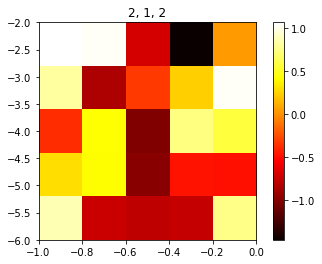

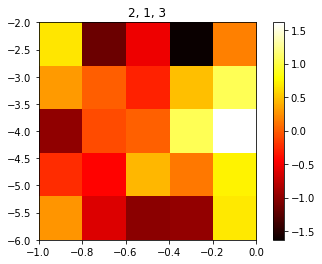

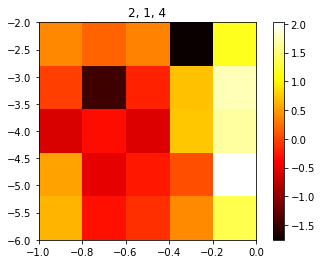

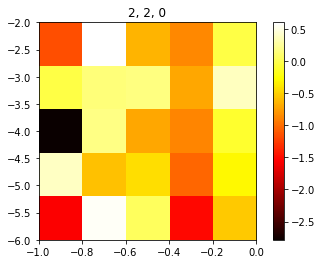

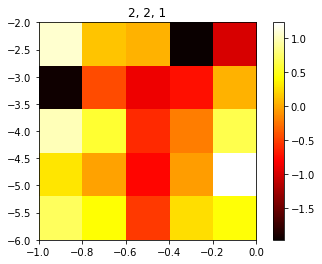

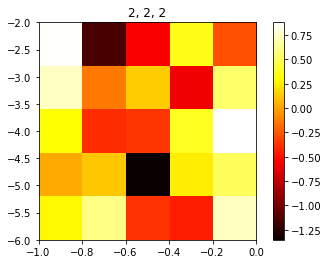

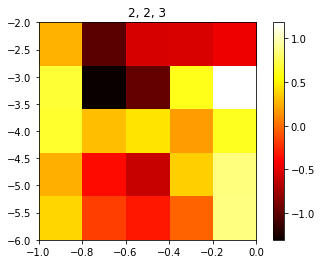

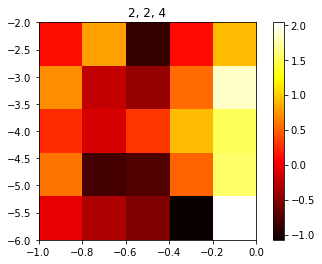

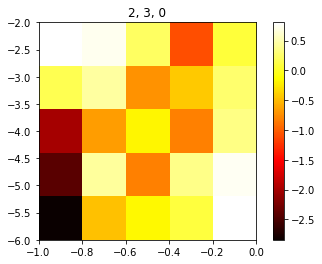

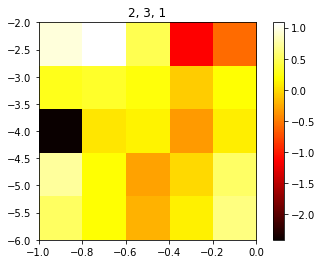

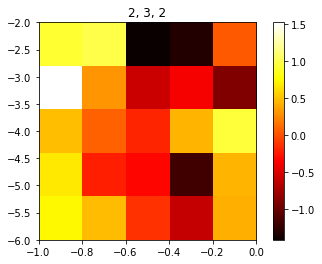

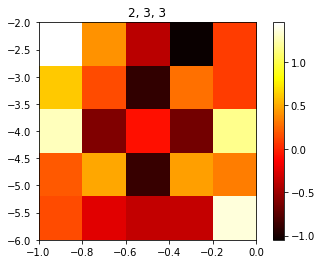

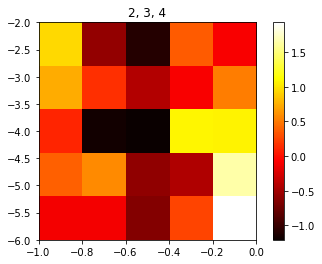

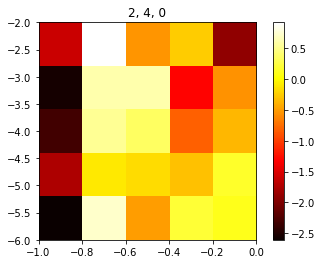

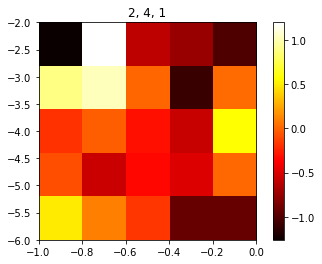

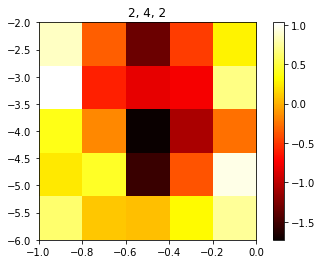

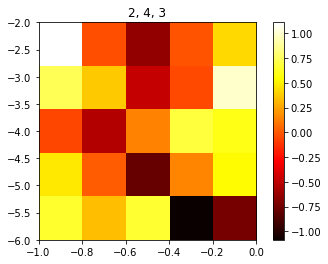

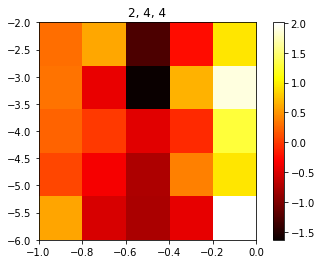

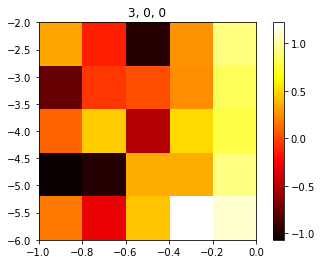

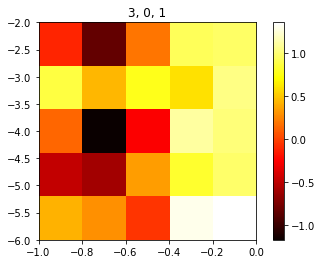

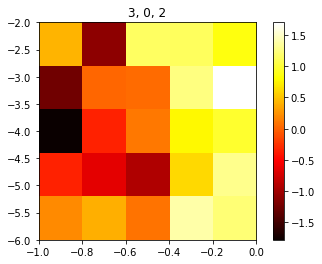

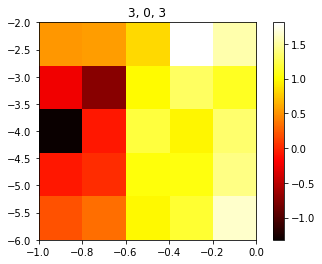

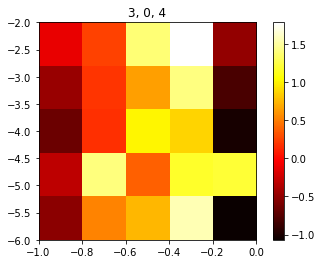

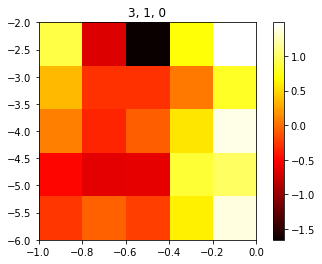

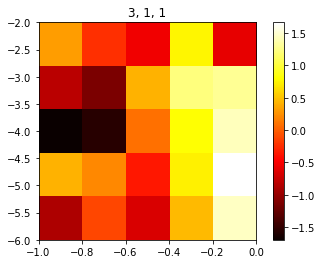

KeyboardInterrupt: 

In [80]:
zerod_difs = difs - np.mean(difs)
zerod_max = max_reward - np.mean(max_reward)
new_difs = zerod_max/np.std(zerod_max) - zerod_difs/(np.std(zerod_difs))
for i in range(5):
    for j in range(5):
        for k in range(5):
            heatmap = plt.imshow(new_difs[:,:,i,j,k], cmap='hot', interpolation='nearest', extent=(-1,0,-6,-2), aspect=0.25)
            plt.colorbar(heatmap)
            plt.title(str(i) + ', ' + str(j) + ', ' + str(k))
            plt.show()
np.mean(new_difs)

In [68]:
np.std(new_difs)
np.mean(abs(new_difs))

0.90299161529192784

In [23]:
bins

array([[-1.,  0.],
       [-6., -2.]])

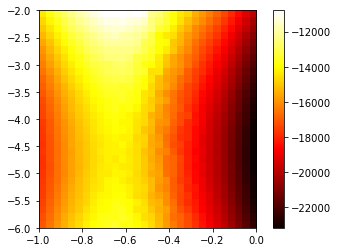

In [41]:
heatmap = plt.imshow(avg_reward, cmap='hot', interpolation='nearest', extent=(-1,0,-6,-2), aspect=0.25)
plt.colorbar(heatmap)
plt.show()